In [3]:
cd "week 4"

C:\Users\danie\homework\week 4


In [4]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [5]:
whale_returns = pd.read_csv("whale_returns.csv", index_col="Date", infer_datetime_format=True,parse_dates=True)
algo_returns = pd.read_csv("algo_returns.csv" , index_col="Date", infer_datetime_format=True,parse_dates=True)
sp500_history = pd.read_csv("sp500_history.csv", index_col="Date", infer_datetime_format=True,parse_dates=True)

In [6]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [22]:
whale_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [7]:
whale_returns.sort_index(ascending=True)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [8]:
whale_returns.dropna(inplace=True)

In [9]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [115]:
soros_portfolio=whale_returns['SOROS FUND MANAGEMENT LLC']
soros_portfolio.to_frame()

,SOROS FUND MANAGEMENT LLC
Date,
2015-03-03,-0.001266
2015-03-04,0.002230
2015-03-05,0.004016
2015-03-06,-0.007905
2015-03-09,0.000582
...,...
2019-04-25,-0.000285
2019-04-26,0.008149
2019-04-29,0.001254


In [18]:
whale_returns.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

In [19]:
paulson_portfolio=whale_returns['PAULSON & CO.INC. ']
paulson_portfolio.to_frame()

,PAULSON & CO.INC.
Date,
2015-03-03,-0.004981
2015-03-04,0.003241
2015-03-05,0.004076
2015-03-06,-0.003574
2015-03-09,0.004225
...,...
2019-04-25,-0.001291
2019-04-26,0.009162
2019-04-29,0.002719


In [16]:
tiger_portfolio=whale_returns['TIGER GLOBAL MANAGEMENT LLC']
tiger_portfolio.to_frame()

,TIGER GLOBAL MANAGEMENT LLC
Date,
2015-03-03,-0.000496
2015-03-04,-0.002534
2015-03-05,0.002355
2015-03-06,-0.008481
2015-03-09,0.005843
...,...
2019-04-25,-0.005153
2019-04-26,0.012355
2019-04-29,0.006251


In [20]:
berkshire_portfolio=whale_returns['BERKSHIRE HATHAWAY INC']
berkshire_portfolio.to_frame()

,BERKSHIRE HATHAWAY INC
Date,
2015-03-03,-0.006569
2015-03-04,0.004213
2015-03-05,0.006726
2015-03-06,-0.013098
2015-03-09,-0.001652
...,...
2019-04-25,0.004848
2019-04-26,0.010434
2019-04-29,0.005223


In [21]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [23]:
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [24]:
algo_returns.sort_index(ascending=True)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [26]:
algo_returns.dropna(inplace=True)

In [27]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [34]:
algo_returns.columns

Index(['Algo 1', 'Algo 2'], dtype='object')

In [33]:
algo1=algo_returns['Algo 1']
algo1.to_frame()

,Algo 1
Date,
2014-06-05,0.004062
2014-06-06,0.001857
2014-06-09,-0.005012
2014-06-10,0.004406
2014-06-11,0.004760
...,...
2019-04-25,0.000682
2019-04-26,0.002981
2019-04-29,0.005208


In [36]:
algo2=algo_returns['Algo 2']
algo2.to_frame()

,Algo 2
Date,
2014-06-05,0.013285
2014-06-06,0.008284
2014-06-09,0.005668
2014-06-10,-0.000735
2014-06-11,-0.003761
...,...
2019-04-25,-0.007247
2019-04-26,0.005256
2019-04-29,0.002829


In [37]:
sp500_history.head()

,Close
Date,
2019-04-23,"$2,933.68"
2019-04-22,"$2,907.97"
2019-04-18,"$2,905.03"
2019-04-17,"$2,900.45"
2019-04-16,"$2,907.06"


In [38]:
sp500_history.dtypes

Close    object
dtype: object

In [39]:
sp500_history.sort_index(ascending=True)

,Close
Date,
2012-10-01,"$1,444.49"
2012-10-02,"$1,445.75"
2012-10-03,"$1,450.99"
2012-10-04,"$1,461.40"
2012-10-05,"$1,460.93"
...,...
2019-04-16,"$2,907.06"
2019-04-17,"$2,900.45"
2019-04-18,"$2,905.03"


In [40]:
sp500_history.dropna(inplace=True)

In [41]:
sp500_history.isnull().sum()

Close    0
dtype: int64

In [43]:
columns = ["sp500 value"]
sp500_history.columns = columns
sp500_history.head()

,sp500 value
Date,
2019-04-23,"$2,933.68"
2019-04-22,"$2,907.97"
2019-04-18,"$2,905.03"
2019-04-17,"$2,900.45"
2019-04-16,"$2,907.06"


In [44]:
sp500_history['sp500 value'] = sp500_history['sp500 value'].str.replace('$', '').str.replace(',','')
sp500_history.head()

,sp500 value
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [45]:
sp500_history.sort_index(ascending=True)

,sp500 value
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [46]:
sp500_history.dtypes

sp500 value    object
dtype: object

In [47]:
sp500_history["sp500 value"] = sp500_history["sp500 value"].astype(object).astype(float)
sp500_history

,sp500 value
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [49]:
sp500_history=sp500_history.sort_index(ascending=True)
sp500_history

,sp500 value
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [68]:
sp500_daily=sp500_history.pct_change()
sp500_daily

,sp500 value
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [69]:
combined_portfolios = pd.concat([soros_portfolio,paulson_portfolio,tiger_portfolio,berkshire_portfolio,algo1,algo2,sp500_daily], axis="columns", join="inner")
combined_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 value
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


<AxesSubplot:xlabel='Date'>

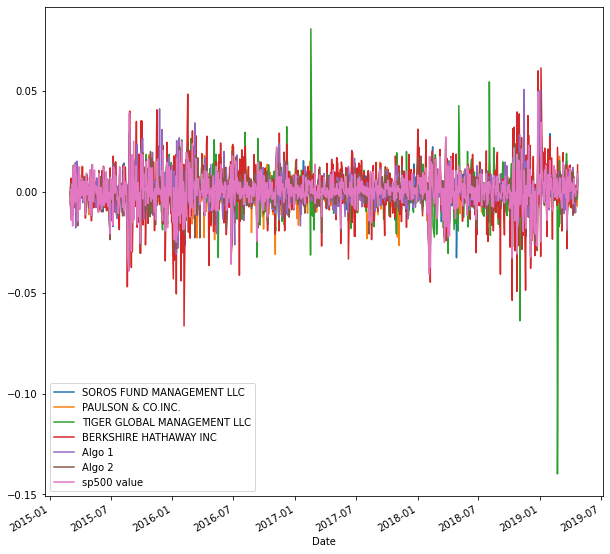

In [74]:
combined_portfolios.plot(figsize=(10,10))

In [75]:
combined_portfolios.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'sp500 value'],
      dtype='object')

In [76]:
soros_cum=combined_portfolios['SOROS FUND MANAGEMENT LLC'].sum()
soros_cum

0.18489065699999993

In [77]:
paulson_cum=combined_portfolios['PAULSON & CO.INC. '].sum()
paulson_cum

-0.223136485

In [78]:
tiger_cum=combined_portfolios['TIGER GLOBAL MANAGEMENT LLC'].sum()
tiger_cum

-0.08665013999999993

In [79]:
berkshire_cum=combined_portfolios['BERKSHIRE HATHAWAY INC'].sum()
berkshire_cum

0.5277860320000001

In [80]:
algo1_cum=combined_portfolios['Algo 1'].sum()
algo1_cum

0.6902463650000001

In [81]:
algo2_cum=combined_portfolios['Algo 2'].sum()
algo2_cum

0.274802961

In [110]:
sp500_cum=combined_portfolios['sp500 value'].sum()
sp500_cum

0.3643291122304405

In [95]:
combined_cum = pd.DataFrame({'cummulative returns':[soros_cum,paulson_cum,tiger_cum,berkshire_cum,algo1_cum,algo2_cum,sp500_cum]},index=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1','Algo 2', 'sp500 value'])
combined_cum

,cummulative returns
SOROS FUND MANAGEMENT LLC,0.184891
PAULSON & CO.INC.,-0.223136
TIGER GLOBAL MANAGEMENT LLC,-0.086650
BERKSHIRE HATHAWAY INC,0.527786
Algo 1,0.690246
Algo 2,0.274803
sp500 value,0.364329


In [96]:
combined_cum.dtypes

cummulative returns    float64
dtype: object

<AxesSubplot:>

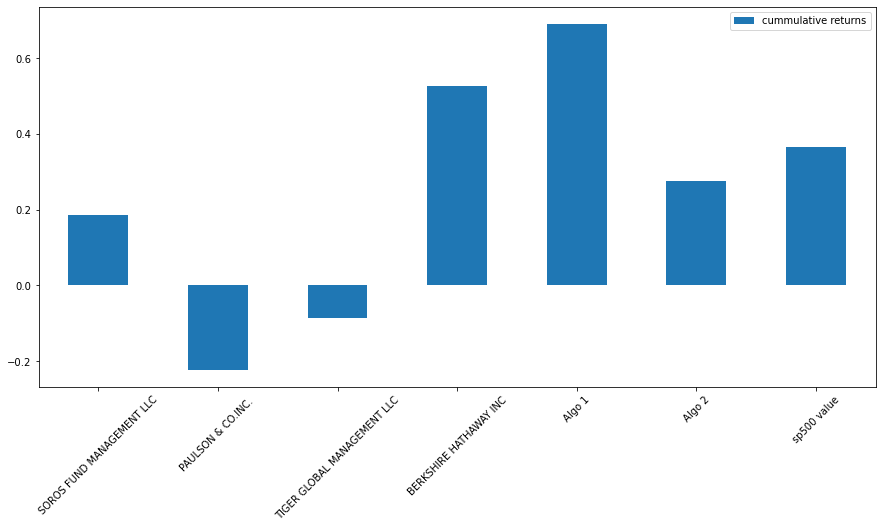

In [104]:
combined_cum.plot(kind='bar',rot=45,figsize=(15,7))

<AxesSubplot:>

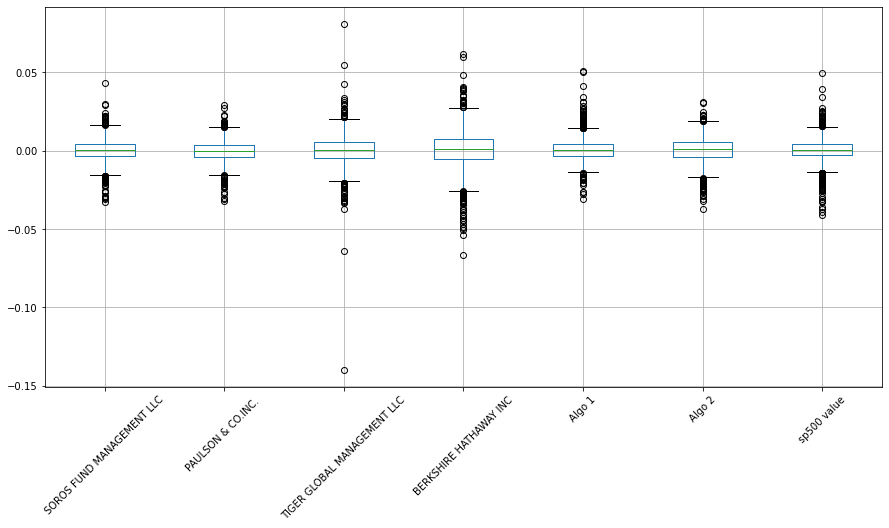

In [121]:
combined_portfolios.boxplot(rot=45,figsize=(15,7))

In [127]:
combined_portfolios_std = combined_portfolios.std()
combined_portfolios_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500 value                    0.008554
dtype: float64

In [131]:
combined_portfolios_std.to_frame()

,0
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500 value,0.008554


In [147]:
combined_portfolios_std_annualized = combined_portfolios_std * np.sqrt(252) 
combined_portfolios_std_annualized

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500 value                    0.135786
dtype: float64

In [301]:
for key,value in combined_portfolios_std_annualized.items():
    if value > combined_portfolios_std_annualized[6]:
        print(f"These portolfio are risk {key}")
        

These portolfio are risk TIGER GLOBAL MANAGEMENT LLC
These portolfio are risk BERKSHIRE HATHAWAY INC


<AxesSubplot:xlabel='Date'>

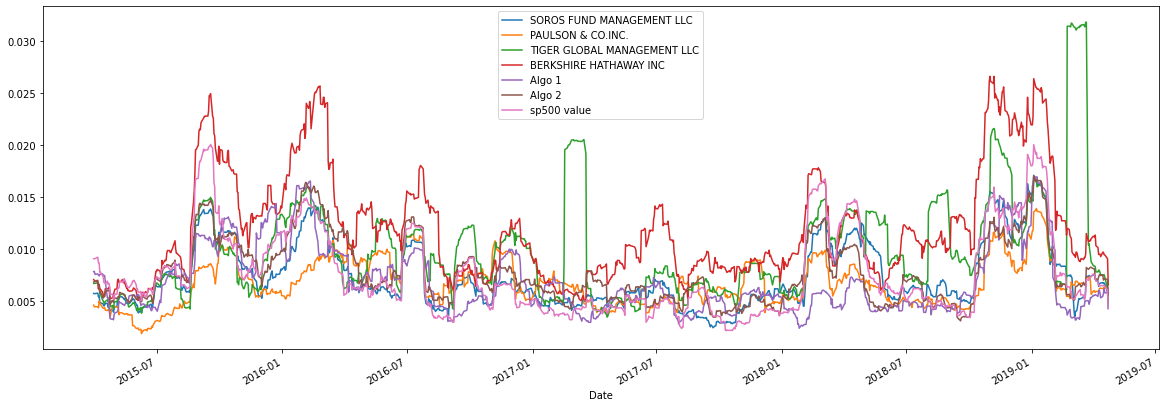

In [165]:
combined_portfolios.rolling(21).std().plot(figsize=(20,7))

<AxesSubplot:xlabel='Date'>

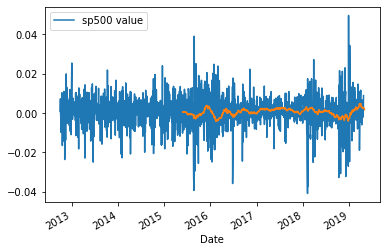

In [171]:
ax=sp500_daily.plot()
berkshire_portfolio.rolling(window=60).mean().plot(ax=ax)

In [173]:
sharpe_ratios = (combined_portfolios.mean() * 252) / (combined_portfolios_std) * np.sqrt(252)
sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC       89.817069
PAULSON & CO.INC.             -121.859540
TIGER GLOBAL MANAGEMENT LLC    -30.507008
BERKSHIRE HATHAWAY INC         156.696149
Algo 1                         347.419467
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

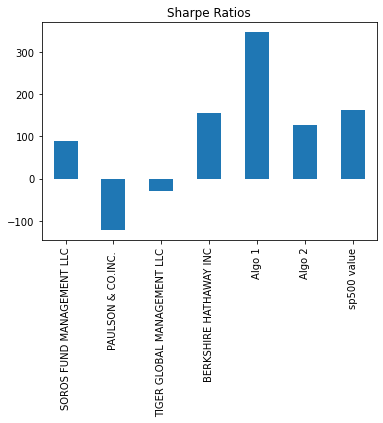

In [174]:
sharpe_ratios.plot.bar(title='Sharpe Ratios')

In [175]:
goog_history = pd.read_csv("goog_historical.csv")
aapl_history = pd.read_csv("aapl_historical.csv")
cost_history = pd.read_csv("cost_historical.csv")

In [202]:
combine_custom = pd.concat([goog_history,aapl_history,cost_history], axis="columns", join="inner")
combine_custom

,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38,AAPL,5/9/2019,200.72,COST,5/9/2019,243.47
1,GOOG,5/8/2019,1166.27,AAPL,5/8/2019,202.90,COST,5/8/2019,241.34
2,GOOG,5/7/2019,1174.10,AAPL,5/7/2019,202.86,COST,5/7/2019,240.18
3,GOOG,5/6/2019,1189.39,AAPL,5/6/2019,208.48,COST,5/6/2019,244.23
4,GOOG,5/3/2019,1185.40,AAPL,5/3/2019,211.75,COST,5/3/2019,244.62
...,...,...,...,...,...,...,...,...,...
245,GOOG,5/17/2018,1078.59,AAPL,5/17/2018,186.99,COST,5/17/2018,199.60
246,GOOG,5/16/2018,1081.77,AAPL,5/16/2018,188.18,COST,5/16/2018,198.71
247,GOOG,5/15/2018,1079.23,AAPL,5/15/2018,186.44,COST,5/15/2018,195.48
248,GOOG,5/14/2018,1100.20,AAPL,5/14/2018,188.15,COST,5/14/2018,195.88


In [212]:
combine_custom.columns

Index(['Symbol', 'Trade DATE', 'NOCP', 'Symbol', 'Trade DATE', 'NOCP',
       'Symbol', 'Trade DATE', 'NOCP'],
      dtype='object')

In [214]:
combine_custom.columns = ['Symbol', 'Trade DATE', 'NOCP', 'Symbol', 'Trade DATE1', 'NOCP','Symbol', 'Trade DATE2', 'NOCP']
combine_custom

,Symbol,Trade DATE,NOCP,Symbol,Trade DATE1,NOCP,Symbol,Trade DATE2,NOCP
0,GOOG,5/9/2019,1162.38,AAPL,5/9/2019,200.72,COST,5/9/2019,243.47
1,GOOG,5/8/2019,1166.27,AAPL,5/8/2019,202.90,COST,5/8/2019,241.34
2,GOOG,5/7/2019,1174.10,AAPL,5/7/2019,202.86,COST,5/7/2019,240.18
3,GOOG,5/6/2019,1189.39,AAPL,5/6/2019,208.48,COST,5/6/2019,244.23
4,GOOG,5/3/2019,1185.40,AAPL,5/3/2019,211.75,COST,5/3/2019,244.62
...,...,...,...,...,...,...,...,...,...
245,GOOG,5/17/2018,1078.59,AAPL,5/17/2018,186.99,COST,5/17/2018,199.60
246,GOOG,5/16/2018,1081.77,AAPL,5/16/2018,188.18,COST,5/16/2018,198.71
247,GOOG,5/15/2018,1079.23,AAPL,5/15/2018,186.44,COST,5/15/2018,195.48
248,GOOG,5/14/2018,1100.20,AAPL,5/14/2018,188.15,COST,5/14/2018,195.88


In [259]:
combine_custom_1=combine_custom.drop(columns=['Trade DATE1','Trade DATE2'])
combine_custom_1

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
5/9/2019,GOOG,1162.38,AAPL,200.72,COST,243.47
5/8/2019,GOOG,1166.27,AAPL,202.90,COST,241.34
5/7/2019,GOOG,1174.10,AAPL,202.86,COST,240.18
5/6/2019,GOOG,1189.39,AAPL,208.48,COST,244.23
5/3/2019,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...
5/17/2018,GOOG,1078.59,AAPL,186.99,COST,199.60
5/16/2018,GOOG,1081.77,AAPL,188.18,COST,198.71
5/15/2018,GOOG,1079.23,AAPL,186.44,COST,195.48


In [260]:
combine_custom_1.sort_values("Trade DATE", ascending=True)

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
1/10/2019,GOOG,1070.33,AAPL,153.80,COST,210.64
1/11/2019,GOOG,1057.19,AAPL,152.29,COST,210.51
1/14/2019,GOOG,1044.69,AAPL,150.00,COST,209.00
1/15/2019,GOOG,1077.15,AAPL,153.07,COST,211.03
1/16/2019,GOOG,1080.97,AAPL,154.94,COST,210.18
...,...,...,...,...,...,...
9/28/2018,GOOG,1193.47,AAPL,225.74,COST,234.88
9/4/2018,GOOG,1197.00,AAPL,228.36,COST,234.68
9/5/2018,GOOG,1186.48,AAPL,226.87,COST,235.61


In [261]:
combine_custom_1.columns

Index(['Symbol', 'NOCP', 'Symbol', 'NOCP', 'Symbol', 'NOCP'], dtype='object')

In [265]:
combine_custom_1.columns =  ['Symbol', 'GOOGNOCP', 'Symbol', 'AAPLNOCP', 'Symbol', 'COSTNOCP']
combine_custom_1

,Symbol,GOOGNOCP,Symbol,AAPLNOCP,Symbol,COSTNOCP
Trade DATE,,,,,,
5/9/2019,GOOG,1162.38,AAPL,200.72,COST,243.47
5/8/2019,GOOG,1166.27,AAPL,202.90,COST,241.34
5/7/2019,GOOG,1174.10,AAPL,202.86,COST,240.18
5/6/2019,GOOG,1189.39,AAPL,208.48,COST,244.23
5/3/2019,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...
5/17/2018,GOOG,1078.59,AAPL,186.99,COST,199.60
5/16/2018,GOOG,1081.77,AAPL,188.18,COST,198.71
5/15/2018,GOOG,1079.23,AAPL,186.44,COST,195.48


In [266]:
combine_custom_1.dtypes

Symbol       object
GOOGNOCP    float64
Symbol       object
AAPLNOCP    float64
Symbol       object
COSTNOCP    float64
dtype: object

In [279]:
combine_custom_2=combine_custom_1.drop(columns=['Symbol'])
combine_custom_2

,GOOGNOCP,AAPLNOCP,COSTNOCP
Trade DATE,,,
5/9/2019,1162.38,200.72,243.47
5/8/2019,1166.27,202.90,241.34
5/7/2019,1174.10,202.86,240.18
5/6/2019,1189.39,208.48,244.23
5/3/2019,1185.40,211.75,244.62
...,...,...,...
5/17/2018,1078.59,186.99,199.60
5/16/2018,1081.77,188.18,198.71
5/15/2018,1079.23,186.44,195.48


In [280]:
combine_custom_2.dtypes

GOOGNOCP    float64
AAPLNOCP    float64
COSTNOCP    float64
dtype: object

In [283]:
daily_returns = combine_custom_2.pct_change()
daily_returns

,GOOGNOCP,AAPLNOCP,COSTNOCP
Trade DATE,,,
5/9/2019,NaN,NaN,NaN
5/8/2019,0.003347,0.010861,-0.008749
5/7/2019,0.006714,-0.000197,-0.004806
5/6/2019,0.013023,0.027704,0.016862
5/3/2019,-0.003355,0.015685,0.001597
...,...,...,...
5/17/2018,0.011469,0.003650,0.003217
5/16/2018,0.002948,0.006364,-0.004459
5/15/2018,-0.002348,-0.009246,-0.016255


In [288]:
daily_returns.dropna(inplace=True)

In [289]:
daily_returns.isnull().sum()

GOOGNOCP    0
AAPLNOCP    0
COSTNOCP    0
dtype: int64

In [290]:
daily_returns.head()

,GOOGNOCP,AAPLNOCP,COSTNOCP
Trade DATE,,,
5/8/2019,0.003347,0.010861,-0.008749
5/7/2019,0.006714,-0.000197,-0.004806
5/6/2019,0.013023,0.027704,0.016862
5/3/2019,-0.003355,0.015685,0.001597
5/2/2019,-0.019226,-0.012279,-0.007890


In [303]:
weights = [1/3,1/3,1/3]

weighted_returns = combine_custom_2.dot(weights)
weighted_returns.head().to_frame()

,0
Trade DATE,
5/9/2019,535.523333
5/8/2019,536.836667
5/7/2019,539.046667
5/6/2019,547.366667
5/3/2019,547.256667
